### Introduction to Qubit and it's representation in Bloch Sphere

Classical computer can be in the state 0 or the state 1. A qubit can also be in the state $ |0\rangle $ or the state $ |1\rangle $ however, it also can exist in a superposition state which is a linear combination of $ |0\rangle $ and $ |1\rangle $. If we have a state labeled as $|\psi\rangle$ then the superposition state can be expressed as:

$$ |\psi\rangle = \alpha |0\rangle+\beta|1\rangle $$

\noindent The values of $\alpha$ and $\beta$ are complex number of the form $z = x+iy$ and $i=\sqrt{-1}$. After measurement, the superposition state will be found in either state $|0\rangle$ or state $|1\rangle$. The probability of finding the either state depends on the modulus square of $\alpha$ and $\beta$ as follows:


The probability of finding $|\psi\rangle$ in the state $|0\rangle$ is given by $|\alpha|^2$

The probability of finding $|\psi\rangle$ in the state $|1\rangle$ is given by $|\beta|^2$

The sum of the both probabilities must be equal to one therefore:
$$ |\alpha|^2 + |\beta|^2 = 1 $$

If the state have N possible outcomes then each outcome is labeled by $pi$ as follows:

$$
\sum^{N}_{i=1} p_i = p_1 + p_2 +\cdots+p_N = 1
$$


In [1]:
import numpy as np
from math import sqrt, cos, sin, pi
from math import e as exp

Find the probability of finding the state $|0\rangle$ and the state $|1\rangle$ in: $$ |\psi\rangle = \frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle $$

In [2]:
state_1 = np.array([[1/sqrt(3)], [sqrt(2/3)]])

The probability of finding state $|0\rangle$ is:

In [3]:
state_1[0]*np.conj(state_1[0])

array([0.33333333])

The probability of finding state $|1\rangle$ is:

In [4]:
state_1[1]*np.conj(state_1[1])

array([0.66666667])

The total probability of both states $ |\alpha|^2 + |\beta|^2 $

In [5]:
(state_1[0]*np.conj(state_1[0]))+(state_1[1]*np.conj(state_1[1]))

array([1.])

Find the probability of finding the state $|0\rangle$ and the state $|1\rangle$ in: $$ |\phi\rangle = \frac{i}{2}|0\rangle + \frac{\sqrt{3}}{2}|1\rangle $$

In [6]:
state_2 = np.array([[(0+1.j)/2], [sqrt(3)/2]])

In [7]:
state_2

array([[0.       +0.5j],
       [0.8660254+0.j ]])

The probability of finding state $|0\rangle$ is:

In [8]:
state_2[0]*np.conj(state_2[0])

array([0.25+0.j])

The probability of finding state $|1\rangle$ is:

In [9]:
state_2[1]*np.conj(state_2[1])

array([0.75+0.j])

The total probability of both states $ |\alpha|^2 + |\beta|^2 $

In [10]:
(state_2[0]*np.conj(state_2[0]))+(state_2[1]*np.conj(state_2[1]))

array([1.+0.j])

Find the probability of finding the state $|0\rangle$ and the state $|1\rangle$ in: $$ |\eta\rangle = \frac{1+i}{\sqrt{3}}|0\rangle + \frac{i}{\sqrt{3}}|1\rangle $$

In [11]:
state_3 = np.array([[(1+1.j)/(sqrt(3))], [(0+1.j)/sqrt(3)]])

In [12]:
state_3

array([[0.57735027+0.57735027j],
       [0.        +0.57735027j]])

The probability of finding state $|0\rangle$ is:

In [13]:
state_3[0]*np.conj(state_3[0])

array([0.66666667+0.j])

The probability of finding state $|1\rangle$ is:

In [14]:
state_3[1]*np.conj(state_3[1])

array([0.33333333+0.j])

The total probability of both states $ |\alpha|^2 + |\beta|^2 $

In [15]:
(state_3[0]*np.conj(state_3[0]))+(state_3[1]*np.conj(state_3[1]))

array([1.+0.j])

Find the probability of finding the state $|0\rangle$ and the state $|1\rangle$ in: $$ |\zeta\rangle = cos \frac{\theta}{2}|0\rangle + e^{i\phi} sin \frac{\theta}{2}|1\rangle $$
Let us assume $\theta = pi$ and $\phi = 0$

In [16]:
state_4 = np.array([[cos(pi/2)], [(exp**((0+1.j)*0))*sin(pi/2)]])

The probability of finding state $|0\rangle$ is:

In [17]:
state_4[0]*np.conj(state_4[0])

array([3.74939946e-33+0.j])

The probability of finding state $|1\rangle$ is:

In [18]:
state_4[1]*np.conj(state_4[1])

array([1.+0.j])

The total probability of both states $ |\alpha|^2 + |\beta|^2 $

In [19]:
(state_4[0]*np.conj(state_4[0]))+(state_4[1]*np.conj(state_4[1]))

array([1.+0.j])

### Qubit Representation
Qubit represention in Bloch sphere using QISkit

In [20]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_histogram, plot_state, matplotlib_circuit_drawer as drawer

In [21]:
n = 1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc2 = QuantumCircuit(q, c)
qc2.u3(pi/2,0,0, q[0])

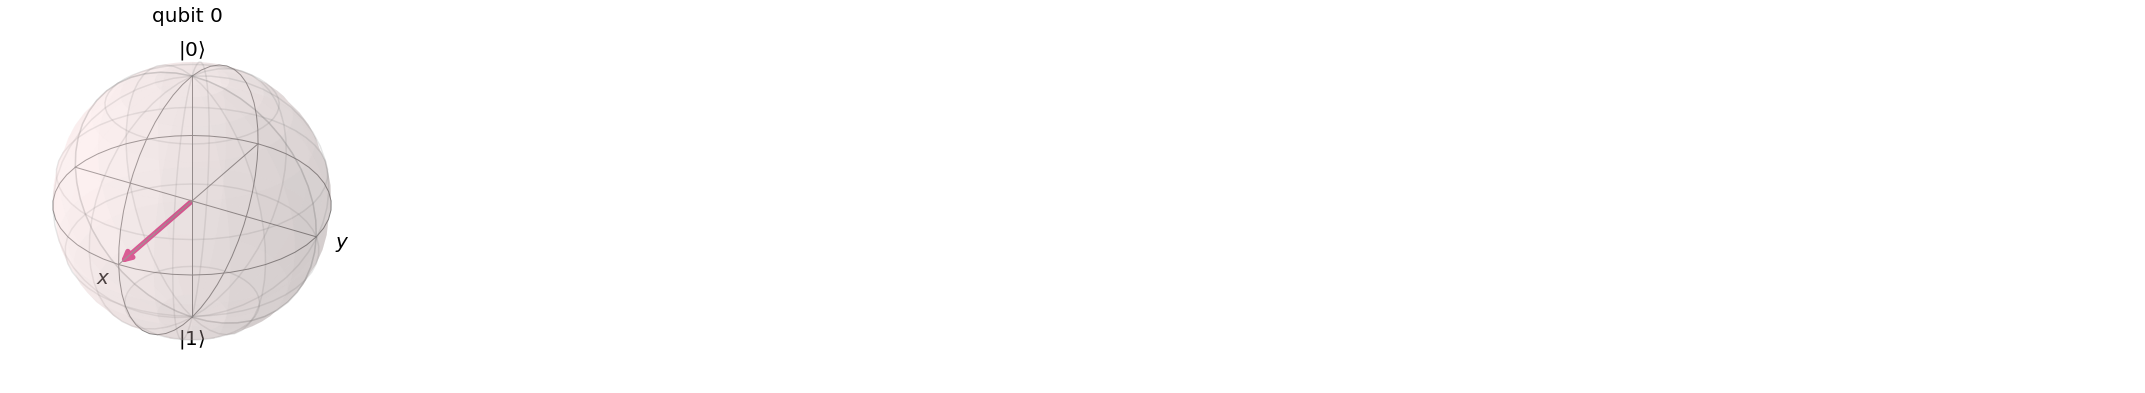

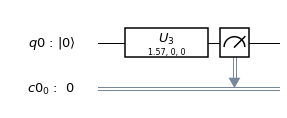

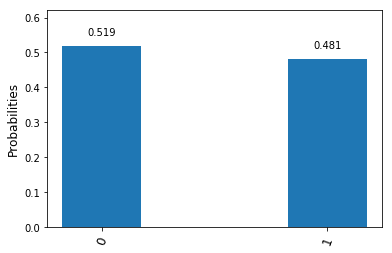

In [22]:
qc = qc2
job = execute(qc2, backend=Aer.get_backend('statevector_simulator'))
state_neg_superposition = job.result().get_statevector(qc2)
rho_neg_superposition=np.outer(state_neg_superposition, state_neg_superposition.conj())
plot_state(rho_neg_superposition, 'bloch')

qc.measure(q,c)
drawer(qc)


job = execute(qc, backend=Aer.get_backend('qasm_simulator'))
result = job.result()
plot_histogram(result.get_counts())